In [5]:
import cv2
import torch
import torchvision.transforms as transforms
from IPython.display import display, clear_output

In [2]:
def capture_game_window():
    # Use OpenCV to capture the game window
    window_name = "Assetto Corsa"  # Provide the name of the game window
    game_window = cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
    cv2.resizeWindow(window_name, 720, 1280)  # Specify the desired window size

    while True:
        # Capture the game window frame by frame
        ret, frame = cv2.read(window_name, game_window)
        if ret:
            return frame

        # Handle key press events or any other user interactions if needed
        # For example, press 'q' to quit the capture loop

    # Release the game window
    cv2.destroyAllWindows()

In [4]:
def capture_game_window():
    # Use OpenCV to capture the game window
    game_window = cv2.VideoCapture(0)  # Replace 0 with the appropriate video source if needed

    while True:
        # Capture the game window frame by frame
        ret, frame = game_window.read()
        if ret:
            # Display the frame in the notebook
            clear_output(wait=True)
            display(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            key = cv2.waitKey(1)

            # Handle key press events or any other user interactions if needed
            if key == ord('q'):  # Press 'q' to quit the capture loop
                break

    # Release the game window
    game_window.release()
    cv2.destroyAllWindows()

In [23]:
from PIL import ImageGrab
import numpy as np
import cv2
import time

last_time = time.time()
times = []
i = 0

while(i < 100):
    img = ImageGrab.grab(bbox=(2,20,1275,820)) #bbox specifies specific region (bbox= x,y,width,height)
    # img_np = np.array(img)
    # frame = cv2.cvtColor(img_np, cv2.COLOR_BGR2GRAY)
    # cv2.imshow("test", frame)
    # cv2.waitKey(0)
    loop_time = time.time() - last_time

    print('loop took {} seconds'.format(loop_time))

    times.append(loop_time)

    i += 1
    last_time = time.time()

print(sum(times)/len(times))

cv2.destroyAllWindows()

loop took 0.05399894714355469 seconds
loop took 0.05500078201293945 seconds
loop took 0.05199885368347168 seconds
loop took 0.0640263557434082 seconds
loop took 0.06097745895385742 seconds
loop took 0.05803370475769043 seconds
loop took 0.04596281051635742 seconds
loop took 0.05002927780151367 seconds
loop took 0.05097055435180664 seconds
loop took 0.04900026321411133 seconds
loop took 0.04999899864196777 seconds
loop took 0.04900050163269043 seconds
loop took 0.05000019073486328 seconds
loop took 0.0520014762878418 seconds
loop took 0.04999828338623047 seconds
loop took 0.05000114440917969 seconds
loop took 0.04899907112121582 seconds
loop took 0.050002336502075195 seconds
loop took 0.05000042915344238 seconds
loop took 0.04999947547912598 seconds
loop took 0.051000356674194336 seconds
loop took 0.053028106689453125 seconds
loop took 0.055973052978515625 seconds
loop took 0.056998252868652344 seconds
loop took 0.058000802993774414 seconds
loop took 0.06599760055541992 seconds
loop too

In [7]:
find_game_window()

Testing video source: 0
Testing video source: 1
Testing video source: 2


In [5]:
capture_game_window()

AttributeError: module 'cv2' has no attribute 'read'

In [21]:
import pygetwindow as gw
from IPython.display import display, clear_output
import time

while True:
    
    # Clear the output
    clear_output(wait=True)

    for title in gw.getAllTitles():
        if title != "":
            print(title)
            
    time.sleep(1)

https://stackoverflow.com/questions/3586046/fastest-way-to-take-a-screenshot-with-python-on-windows/72211337#72211337  
https://stackoverflow.com/questions/35097837/capture-video-data-from-screen-in-python

***

In [5]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
import win32gui, win32ui, win32con, win32api

In [7]:
hwin = win32gui.GetDesktopWindow()

x=0
y=31
width=1280
height=720

hwindc = win32gui.GetWindowDC(hwin)
srcdc = win32ui.CreateDCFromHandle(hwindc)
memdc = srcdc.CreateCompatibleDC()
bmp = win32ui.CreateBitmap()
bmp.CreateCompatibleBitmap(srcdc, width, height)
memdc.SelectObject(bmp)
memdc.BitBlt((0, 0), (width, height), srcdc, (x, y), win32con.SRCCOPY)

signedIntsArray = bmp.GetBitmapBits(True)
img = np.frombuffer(signedIntsArray, dtype='uint8')
img.shape = (height,width,4)

srcdc.DeleteDC()
memdc.DeleteDC()
win32gui.ReleaseDC(hwin, hwindc)
win32gui.DeleteObject(bmp.GetHandle())

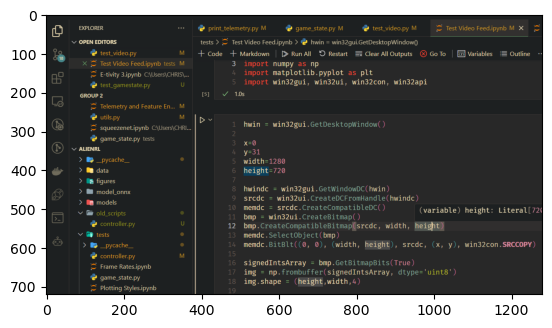

In [9]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGRA2RGB))

In [9]:
def grab_screen(region=None):

    hwin = win32gui.GetDesktopWindow()

    if region:
            left, top, x2, y2 = region
            width = x2 - left + 1
            height = y2 - top + 1
    else:
        width = win32api.GetSystemMetrics(win32con.SM_CXVIRTUALSCREEN)
        height = win32api.GetSystemMetrics(win32con.SM_CYVIRTUALSCREEN)
        left = win32api.GetSystemMetrics(win32con.SM_XVIRTUALSCREEN)
        top = win32api.GetSystemMetrics(win32con.SM_YVIRTUALSCREEN)

    hwindc = win32gui.GetWindowDC(hwin)
    srcdc = win32ui.CreateDCFromHandle(hwindc)
    memdc = srcdc.CreateCompatibleDC()
    bmp = win32ui.CreateBitmap()
    bmp.CreateCompatibleBitmap(srcdc, width, height)
    memdc.SelectObject(bmp)
    memdc.BitBlt((0, 0), (width, height), srcdc, (left, top), win32con.SRCCOPY)
    
    signedIntsArray = bmp.GetBitmapBits(True)
    img = np.frombuffer(signedIntsArray, dtype='uint8')
    img.shape = (height,width,4)

    srcdc.DeleteDC()
    memdc.DeleteDC()
    win32gui.ReleaseDC(hwin, hwindc)
    win32gui.DeleteObject(bmp.GetHandle())

    return cv2.cvtColor(img, cv2.COLOR_BGRA2RGB)

In [10]:
start_time = time.time()
img = grab_screen(region=(0,40,800,640))
print(f"grab screen took {time.time()-start_time} seconds")

grab screen took 0.026001691818237305 seconds


In [11]:
i = 0
times = []
start_time = time.time()

while i < 60:
    screen = grab_screen(region=(0,40,800,640))
    loop_time = time.time() - start_time
    print('loop took {} seconds'.format(loop_time))
    times.append(loop_time)
    start_time = time.time()
    i += 1

loop took 0.01100301742553711 seconds
loop took 0.01499629020690918 seconds
loop took 0.016010761260986328 seconds
loop took 0.01599574089050293 seconds
loop took 0.016995668411254883 seconds
loop took 0.017000198364257812 seconds
loop took 0.01600027084350586 seconds
loop took 0.015974044799804688 seconds
loop took 0.017001867294311523 seconds
loop took 0.016999483108520508 seconds
loop took 0.015999794006347656 seconds
loop took 0.017999649047851562 seconds
loop took 0.015025615692138672 seconds
loop took 0.017974853515625 seconds
loop took 0.01600170135498047 seconds
loop took 0.01603078842163086 seconds
loop took 0.016990184783935547 seconds
loop took 0.017978429794311523 seconds
loop took 0.015019655227661133 seconds
loop took 0.01697850227355957 seconds
loop took 0.015999794006347656 seconds
loop took 0.01700115203857422 seconds
loop took 0.017000198364257812 seconds
loop took 0.016999006271362305 seconds
loop took 0.01602482795715332 seconds
loop took 0.01600337028503418 seconds

In [12]:
print(sum(times)/len(times))

0.01676683028539022


In [13]:
round(1 /(sum(times)/len(times)),0)

60.0

In [14]:
img = grab_screen(region=(0, 40, 1280, 720))

In [15]:
img.shape

(681, 1281, 3)

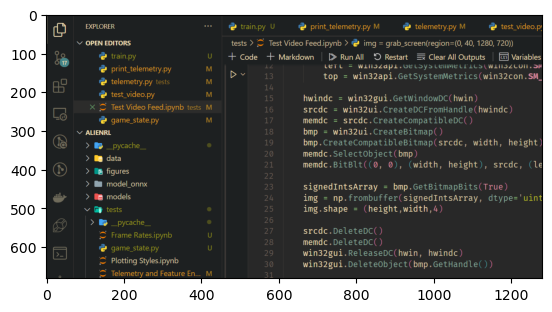

In [16]:
plt.imshow(img)

***

In [6]:
from game_state import GameState
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import numpy as np
import time

In [7]:
game_state = GameState()

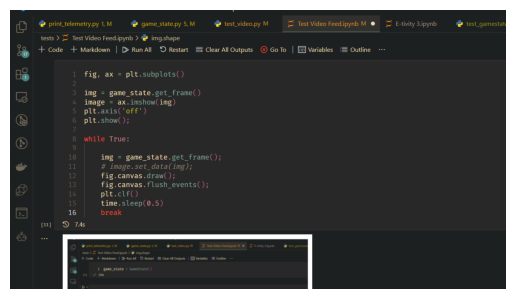

<Figure size 640x480 with 0 Axes>

In [12]:
fig, ax = plt.subplots()

img = game_state.get_frame()
image = ax.imshow(img)
plt.axis('off')
plt.show();

while True:
    
    img = game_state.get_frame();
    # image.set_data(img);
    fig.canvas.draw();
    fig.canvas.flush_events();
    plt.clf()
    time.sleep(0.5)
    break

In [13]:
img.shape

(720, 1280, 3)

***
## Testing win32gui & pyautogui

In [1]:
import pyautogui
import win32gui
import cv2

In [2]:
window_name = 'Assetto Corsa'
left_padding = 11
missing_width = 10 # No clue why but this is needed
missing_height = 11 # No clue why but this is needed

window_handle= win32gui.FindWindow(None, window_name)

In [3]:
print(f"{win32gui.GetWindowRect(window_handle)=}")
print(f"{win32gui.GetClientRect(window_handle)=}")

win32gui.GetWindowRect(window_handle)=(-11, 0, 1291, 776)
win32gui.GetClientRect(window_handle)=(0, 0, 1280, 720)


In [5]:
win32gui.MoveWindow(window_handle, 0 - left_padding, 0, 1280 + missing_width + 12, 720 + 45 + missing_height, False)

# get window position
print(f"{win32gui.GetWindowRect(window_handle)=}")
print(f"{win32gui.GetClientRect(window_handle)=}")

win32gui.GetWindowRect(window_handle)=(-11, 0, 1291, 776)
win32gui.GetClientRect(window_handle)=(0, 0, 1280, 720)


In [120]:
l,t,r,b = win32gui.GetWindowRect(window_handle)
w = r - l - left_padding - missing_width
h = b - t - 45 - missing_height
print(f"Left Pos: {l}, Top Pos: {t}, Width: {w}, Height: {h}")

Left Pos: 1269, Top Pos: 692, Width: 1280, Height: 720


In [89]:
desktop = win32gui.GetDesktopWindow()
win32gui.GetWindowRect(desktop)

(0, 0, 3840, 2160)

In [78]:
window_handle= win32gui.FindWindow(None, window_name)

In [85]:
l,t,r,b = win32gui.GetWindowRect(window_handle)
win32gui.GetWindowRect(window_handle)

(-12, 0, 1290, 776)

In [13]:
window_handle = win32gui.GetForegroundWindow()

In [15]:
win32gui.GetWindowText(window_handle)

'● Test Video Feed.ipynb - AlienRL - Visual Studio Code'

In [128]:
win_l, win_t, win_r, win_b = win32gui.GetWindowRect(window_handle)
clt_l, clt_t, clt_r, clt_b = win32gui.GetClientRect(window_handle)
print(f"win_left={win_l:4d}, win_top={win_t:4d}, win_right={win_r:4d}, win_bottom={win_b:4d}")
print(f"clt_left={clt_l:4d}, clt_top={clt_t:4d}, clt_right={clt_r:4d}, clt_bottom={clt_b:4d}")

win_left=1269, win_top= 692, win_right=2571, win_bottom=1468
clt_left=   0, clt_top=   0, clt_right=1280, clt_bottom= 720


In [117]:
(win_b - win_t) - (clt_b - clt_t)

56

***
### Testing Move Screen

In [1]:
import win32gui
import win32con
import pyautogui


def move_window_to_top_left(x=0, y=0, width=1280, height=720, window_name='Assetto Corsa'):
    # Find the window by its name
    window_handle = win32gui.FindWindow(None, window_name)

    window_name = 'Assetto Corsa'
    left_padding = 11
    missing_width = 10 # No clue why but this is needed
    missing_height = 11 # No clue why but this is needed

    # If the window is found
    if window_handle:
        # Move and resize the window
        # Parameters: window handle, x, y, width, height
        win32gui.MoveWindow(window_handle, 0 - left_padding, 0, width + missing_width + 12, height + 45 + missing_height, True)
    else:
        print(f'Window - {window_name} - not found')

In [3]:
move_window_to_top_left()

In [4]:
window_handle = win32gui.FindWindow(None, "Assetto Corsa")
if window_handle is not None:
    win32gui.ShowWindow(window_handle, win32con.SW_SHOWMINIMIZED)
    win32gui.ShowWindow(window_handle, win32con.SW_SHOWNORMAL)
else:
    print("Window not found")

AttributeError: module 'win32gui' has no attribute 'SwitchToThisWindow'

***
### Test sending keys to specific window

In [22]:
import win32gui
import win32con
import win32api
from time import sleep, time

In [ ]:
hwndMain = win32gui.FindWindow(None, "*Untitled - Notepad")

hwndChild = win32gui.GetWindow(hwndMain, win32con.GW_CHILD)

sleep(2)

while(True):
    
    # Send lowercase j
    temp = win32api.PostMessage(hwndChild, win32con.WM_CHAR, 0x6A, 0)

    #print(temp) prints the returned value of temp, into the console
    print(temp)
    #sleep(1) this waits 1 second before looping through again
    sleep(1)

In [23]:
hwndMain = win32gui.FindWindow(None, "*Untitled - Notepad")
hwndChild = win32gui.GetWindow(hwndMain, win32con.GW_CHILD)

start_time = time()
while time() - start_time < 5:  # hold key for 5 seconds
    win32api.PostMessage(hwndChild, win32con.WM_CHAR, 0x6A, 0)
    sleep(0.01)  # repeat rate of 100 Hz

In [29]:
hwndMain = win32gui.FindWindow(None, "Assetto Corsa")
hwndChild = win32gui.GetWindow(hwndMain, win32con.GW_CHILD)

print(hwndMain)
print(hwndChild)

sleep(5)
start_time = time()
while time() - start_time < 5:  # hold key for 5 seconds
    win32api.PostMessage(hwndMain, win32con.WM_CHAR, 0x6A, 0)
    sleep(0.01)  # repeat rate of 100 Hz

920094
0


In [31]:
import ctypes
import time

SendInput = ctypes.windll.user32.SendInput


W = 0x11
A = 0x1E
S = 0x1F
D = 0x20

NP_2 = 0x50
NP_4 = 0x4B
NP_6 = 0x4D
NP_8 = 0x48

# C struct redefinitions 
PUL = ctypes.POINTER(ctypes.c_ulong)
class KeyBdInput(ctypes.Structure):
    _fields_ = [("wVk", ctypes.c_ushort),
                ("wScan", ctypes.c_ushort),
                ("dwFlags", ctypes.c_ulong),
                ("time", ctypes.c_ulong),
                ("dwExtraInfo", PUL)]

class HardwareInput(ctypes.Structure):
    _fields_ = [("uMsg", ctypes.c_ulong),
                ("wParamL", ctypes.c_short),
                ("wParamH", ctypes.c_ushort)]

class MouseInput(ctypes.Structure):
    _fields_ = [("dx", ctypes.c_long),
                ("dy", ctypes.c_long),
                ("mouseData", ctypes.c_ulong),
                ("dwFlags", ctypes.c_ulong),
                ("time",ctypes.c_ulong),
                ("dwExtraInfo", PUL)]

class Input_I(ctypes.Union):
    _fields_ = [("ki", KeyBdInput),
                 ("mi", MouseInput),
                 ("hi", HardwareInput)]

class Input(ctypes.Structure):
    _fields_ = [("type", ctypes.c_ulong),
                ("ii", Input_I)]

# Actuals Functions

def PressKey(hexKeyCode):
    extra = ctypes.c_ulong(0)
    ii_ = Input_I()
    ii_.ki = KeyBdInput( 0, hexKeyCode, 0x0008, 0, ctypes.pointer(extra) )
    x = Input( ctypes.c_ulong(1), ii_ )
    ctypes.windll.user32.SendInput(1, ctypes.pointer(x), ctypes.sizeof(x))

def ReleaseKey(hexKeyCode):
    extra = ctypes.c_ulong(0)
    ii_ = Input_I()
    ii_.ki = KeyBdInput( 0, hexKeyCode, 0x0008 | 0x0002, 0, ctypes.pointer(extra) )
    x = Input( ctypes.c_ulong(1), ii_ )
    ctypes.windll.user32.SendInput(1, ctypes.pointer(x), ctypes.sizeof(x))

if __name__ == '__main__':
    time.sleep(2)
    PressKey(0x4A)
    time.sleep(5)
    ReleaseKey(0x4A)